# The Final Notebook with the Best Model

## Data Exploration

Loading data and importing necessary libararies 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Resume.csv")
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [3]:
df.tail()

,ID,Resume_str,Resume_html,Category
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2483,37473139,STOREKEEPER II Professional Sum...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


We see the "Category" column can be a good feature for data visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [5]:
df['Category'].value_counts()

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

The above cell shows the frequency counting of our target feature. Where we see the highest number of categories are "INFORMATION-TECHNOLOGY" and "BUSINESS-DEVELOPMENT" on contrary we the lowest is "BPO"

Find below a quick bar chart of the categories according to their frequencies

<Axes: >

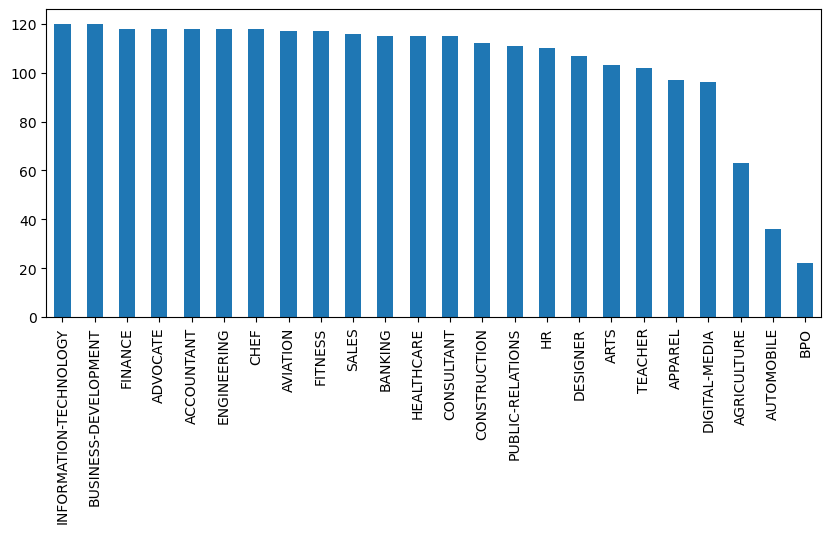

In [6]:
df['Category'].value_counts().plot(kind='bar', figsize=(10, 4))

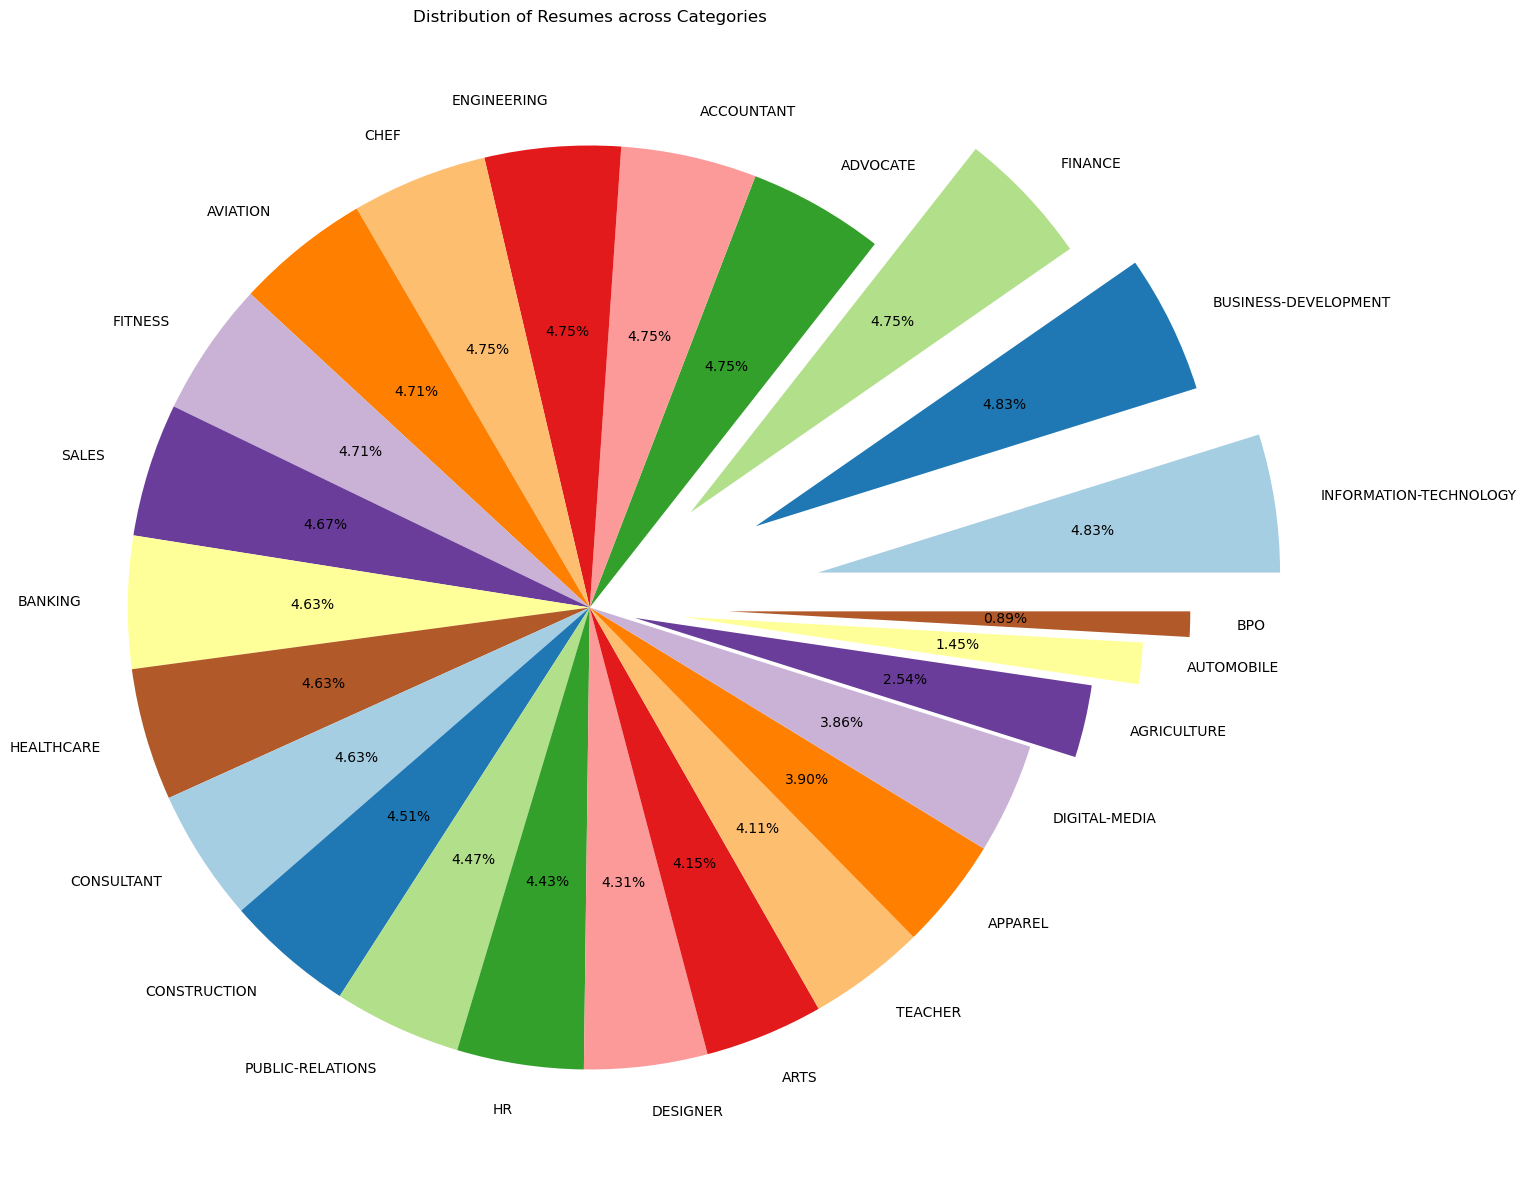

In [7]:
# Pie chart
count=df['Category'].value_counts()
label=df['Category'].value_counts().keys()

plt.figure(1, figsize=(15,15))
myexplode = [0.5, 0.4, 0.3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.2, 0.3]

pie=plt.pie(count, labels=label, autopct='%1.2f%%', colors=plt.cm.Paired.colors, explode = myexplode)
plt.title('Distribution of Resumes across Categories')
plt.show()

On the above pie we see a clear differenciation between the highest and lowest number of categories labeled by their percentage of frquencies.

## Preprocessing

Loading necessary libararies for further process

In [8]:
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [9]:
df = df[['Category','Resume_str']]
df['Category'] = df['Category'].astype('category')

In [10]:
import string
def clean_text(series):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    cleaned_texts = []

    for text in series:
        # Tokenization
        tokens = word_tokenize(text.lower())
        # Removing punctuation and numeric values
        no_punct_tokens = [token for token in tokens if token not in string.punctuation and not token.isnumeric()]
        # Removing stop words
        no_stopwords_tokens = [token for token in no_punct_tokens if token not in stop_words]
        # Lemmatization
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in no_stopwords_tokens]
        # Join tokens back into a string
        cleaned_text = ' '.join(lemmatized_tokens)
        cleaned_texts.append(cleaned_text)

    return cleaned_texts

In [11]:
df['Text'] = clean_text(df['Resume_str'])

In [12]:
df.head()

,Category,Resume_str,Text
0,HR,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,hr administrator/marketing associate hr admini...
1,HR,"HR SPECIALIST, US HR OPERATIONS ...",hr specialist u hr operation summary versatile...
2,HR,HR DIRECTOR Summary Over 2...,hr director summary year experience recruiting...
3,HR,HR SPECIALIST Summary Dedica...,hr specialist summary dedicated driven dynamic...
4,HR,HR MANAGER Skill Highlights ...,hr manager skill highlight hr skill hr departm...


### Dataset splitting

In [13]:
from sklearn.model_selection import train_test_split

train_sentences, test_sentences, train_labels, test_labels = train_test_split(df['Resume_str'].values,
                                                                            df['Category'].values,
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=42)

### Necessary functions

In [14]:
# Function to build the model
def make_model(model):
    model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("choose_model",model ) # model the text
                ])
    model_0.fit(train_sentences, train_labels)
    return model_0

In [15]:
# Function to predict the data
def make_result(model):
    predicts = model.predict(test_sentences)
    result = calculate_results(y_true=test_labels,y_pred=predicts)
    print(result)
    return result

In [16]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

## Model Selection and Training

(In this notebook I only added the best scored model)

In [17]:
from sklearn.ensemble import BaggingClassifier

bagging_model = make_model(BaggingClassifier())
make_result(bagging_model)

{'accuracy': 71.08433734939759, 'precision': 0.7043661826794356, 'recall': 0.7108433734939759, 'f1': 0.6988448162046905}


{'accuracy': 71.08433734939759,
 'precision': 0.7043661826794356,
 'recall': 0.7108433734939759,
 'f1': 0.6988448162046905}

### Model exporting

In [18]:
import pickle

def save_model_to_pickel(model, path):
    with open(path, 'wb') as f:
        pickle.dump(model, f)

In [20]:
save_model_to_pickel(bagging_model,'model/bagging_model.pkl')

Thank you